In [ ]:
import pandas as pd
df=pd.DataFrame()

In [66]:
df=pd.read_csv('powerhouse.csv', index_col='date',parse_dates=True)

<ipython-input-66-5908ec38fee6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('powerhouse.csv', index_col='date',parse_dates=True)


<Axes: xlabel='date'>

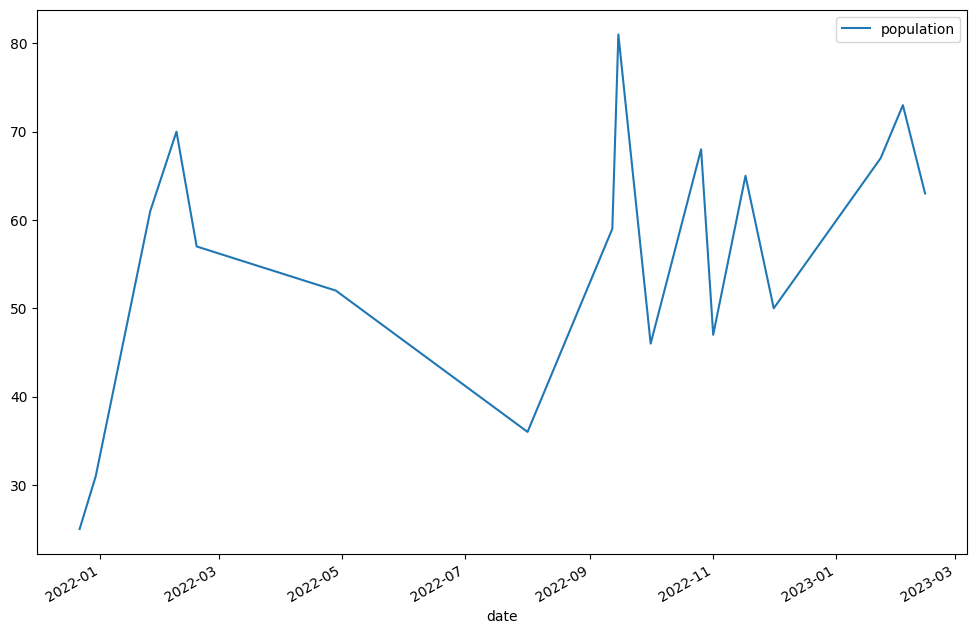

In [ ]:
df.columns = ['population']
df.plot(figsize=(12,8))

In [ ]:
df['population_LastMonth']=df['population'].shift(+1)
df['population_2Monthsback']=df['population'].shift(+2)
df['population_3Monthsback']=df['population'].shift(+3)
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2021-12-22,25,NaN,NaN,NaN
2021-12-30,31,25.0,NaN,NaN
2022-08-01,36,31.0,25.0,NaN
2022-10-01,46,36.0,31.0,25.0
2022-11-01,47,46.0,36.0,31.0
2022-12-01,50,47.0,46.0,36.0
2022-01-26,61,50.0,47.0,46.0
2022-02-18,57,61.0,50.0,47.0
2022-04-28,52,57.0,61.0,50.0


In [ ]:
df=df.dropna()
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-10-01,46,36.0,31.0,25.0
2022-11-01,47,46.0,36.0,31.0
2022-12-01,50,47.0,46.0,36.0
2022-01-26,61,50.0,47.0,46.0
2022-02-18,57,61.0,50.0,47.0
2022-04-28,52,57.0,61.0,50.0
2022-02-08,70,52.0,57.0,61.0
2022-09-15,81,70.0,52.0,57.0
2022-10-26,68,81.0,70.0,52.0


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [ ]:
import numpy as np
x1,x2,x3,y=df['population_LastMonth'],df['population_2Monthsback'],df['population_3Monthsback'],df['population']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[36. 31. 25.]
 [46. 36. 31.]
 [47. 46. 36.]
 [50. 47. 46.]
 [61. 50. 47.]
 [57. 61. 50.]
 [52. 57. 61.]
 [70. 52. 57.]
 [81. 70. 52.]
 [68. 81. 70.]
 [65. 68. 81.]
 [59. 65. 68.]
 [67. 59. 65.]
 [63. 67. 59.]]


In [ ]:
X_train,X_test,y_train,y_test=final_x[1:14],final_x[1:14],y[1:16],y[1:16]
print(X_train.shape)
print(y_train.shape)
     

(13, 3)
(13, 1)


In [ ]:
lin_model.fit(X_train,y_train)


LinearRegression()

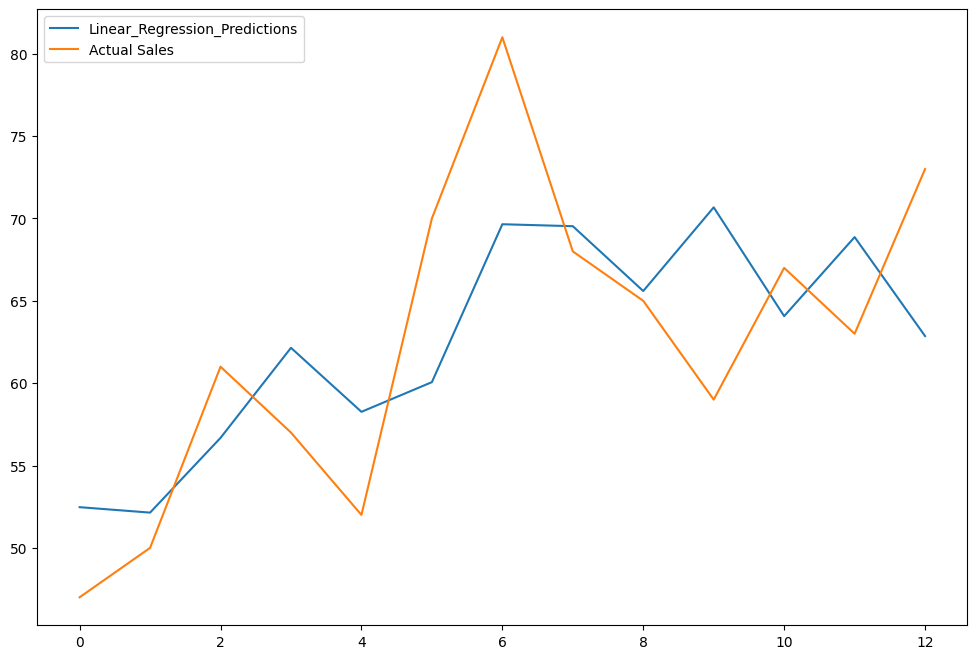

In [72]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [73]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [74]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 6.968812555551488
